In [2]:
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija_verbs = df['n1'].tolist()
verbs_eng_translations = df['eng'].tolist() 
verbs_eng_translations = [verb.replace(" ", "_") for verb in verbs_eng_translations]

print(darija_verbs)
print(verbs_eng_translations)

['kla', 'chrb', 'dkhel', 'khrj', 'fhem', 'chr7', '9ra', '9rra', 'sm3', 'chaf', 'chm', 'da9', '9as', 'mcha', 'ja', 'tl3', 'nzl', '3am', 'ghr9', 'lbs', 'slt', 'chra', 'ba3', 'ttawa', 'ktb', 'ms7', 'drab', 'tsalm', '3ya', 'tskhskh', 'D7k', 'ghdb', 'jab', 'kan', 'dar', 'gal', '9al', '3ndo', 'chedd', 'fkkr', 'ba', 'l9a', '3Ta', 'khdm', '3yeT', 'khass', '7ess', 'wlla', '7TT', '3na', 'bda', 'khss', 'l9a', '3jb', 'khbr', '3awn', '3t9', 'wjjd', '2amn', '7awl', 'jrrb', 'swwl', 'tfkkr', 'mcha', 'byyen', 'l3b', 'jra', 'jrra', '9ra', 'bda', 'sala', '9TT3', '8Dr', 'chker', 'bddel', 'kmmel', 'ftarD', 'tmnna', 'tb3', '9bl', 'rfD', 'w93', 'gls', 'rb7', 'zad', 't3llm', 'tsnna', 'sifT', 'ba3', 'chra', '7ell', 'bna', 'khtar', 'wSl', '9rrer', 'nchT', 'tfrrj', 'khsr', 'tmchcha', 'kbbr', 'tkhyyl', 'sbbeb', '8rrs', 'sme3', 'kbr', 'mat', 'twffa', 'zar', 'chjje3', '7ama', 'nchr', '9tl', 'sag', 'kdb', 't9aj7', '7yyed', 'ddabz', '3mmr', 'safr', '7Dr', '9sse7', '3ana', 'zgl', 'l9a', 'lga', '3bbr', 'rkkz', 'la7', '

In [3]:
from openai import OpenAI
client = OpenAI()


test = client.chat.completions.create(
model =  "gpt-3.5-turbo",
messages = [
    {
        "role": "system",
        "content": "You will be provided with a verb in Moroccan Darija language. Your task is to translate it into English and provide only its lemma as an output." + 
                    "The lemma of the translated verb should not contain 'to'."
    },
    {
        "role": "user", 
        "content": 'chm'
    }
],
temperature=0.1, # deterministic
#max_tokens=1, # in case of a dot
#top_p=0.1
# temperature: What sampling temperature to use, between 0 and 2. Higher values like 0.8 will make the output more random, while lower values like 0.2 will make it more focused and deterministic. We generally recommend altering this or top_p but not both.
# top_p:An alternative to sampling with temperature, called nucleus sampling, where the model considers the results of the tokens with top_p probability mass. So 0.1 means only the tokens comprising the top 10% probability mass are considered.
# max_tokens: The maximum number of tokens that can be generated in the chat completion.

)

test = test.choices[0].message.content
print(test)


sleep


In [4]:
gpt_eng_translations = []
for verb in darija_verbs:
    completion = client.chat.completions.create(
    model =  "gpt-3.5-turbo",
    messages = [
    {
        "role": "system",
        "content": "You will be provided with a verb in Moroccan Darija language. Your task is to translate it into English and provide only its lemma as an output." + 
                    "The lemma of the translated verb should not contain 'to'."
    },
    {
        "role": "user", 
        "content":  f'{verb}' 
    }
    ],
    temperature=0.1, # deterministic
   # max_tokens=1, # in case of a dot
    )
    gpt_eng_translations.append(completion.choices[0].message.content)

print(gpt_eng_translations)

['eat', 'buy', 'enter', 'exit', 'understand', 'search', 'read', 'read', 'listen', 'see', 'sleep', 'sleep', 'laugh', 'go', 'come', 'play', 'descend', 'sleep', 'scratch', 'wear', 'Hello! How can I assist you today?', 'buy', 'go', 'sit', 'write', 'hear', 'hit', 'salute', 'eat', 'laugh', 'laugh', 'laugh', 'bring', 'be', 'live', 'say', 'speak', 'have', 'cut', 'think', 'go', 'find', 'give', 'work', 'see', 'need', 'feel', 'be', 'run', 'eat', 'start', 'cut', 'find', 'like', 'inform', 'help', 'laugh', 'find', 'secure', 'try', 'fetch', 'ask', 'think', 'walk', 'sell', 'play', 'run', 'run', 'read', 'start', 'pray', 'sleep', 'heal', 'see', 'change', 'finish', 'eat', 'wish', 'play', 'accept', 'read', 'eat', 'play', 'run', 'increase', 'learn', 'wait', 'clean', 'go', 'buy', 'remove', 'build', 'choose', 'arrive', 'read', 'search', 'jump', 'lose', 'laugh', 'break', 'imagine', 'laugh', 'run', 'listen', 'grow', 'die', 'clean', 'visit', 'laugh', 'swim', 'think', 'eat', 'laugh', 'hide', 'sleep', 'write', 'j

In [5]:
# Ensure both columns are of the same length
assert len(gpt_eng_translations) == len(verbs_eng_translations), "Columns must be of the same length."


In [8]:
from nltk.corpus import wordnet as wn

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""
    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(gpt_eng_translations)):
        word1, word2 = gpt_eng_translations[i], verbs_eng_translations[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)



[('eat', 'eat', 1.0, True), ('buy', 'drink', 0.2, False), ('enter', 'enter', 1.0, True), ('exit', 'go_out', 1.0, True), ('understand', 'understand', 1.0, True), ('search', 'explain', 0.2, False), ('read', 'learn', 1.0, True), ('read', 'teach', 0.25, False), ('listen', 'hear', 1.0, True), ('see', 'see', 1.0, True), ('sleep', 'smell', 0.2, False), ('sleep', 'taste', 0.25, False), ('laugh', 'touch', 0.25, False), ('go', 'go', 1.0, True), ('come', 'come', 1.0, True), ('play', 'ascend', 0.3333333333333333, False), ('descend', 'go_down', 1.0, True), ('sleep', 'swim', 0.2, False), ('scratch', 'drown', 0.25, False), ('wear', 'wear', 1.0, True), ('Hello! How can I assist you today?', 'take_off', 0, False), ('buy', 'buy', 1.0, True), ('go', 'sell', 0.3333333333333333, False), ('sit', 'bargain', 0.14285714285714285, False), ('write', 'write', 1.0, True), ('hear', 'clean', 0.25, False), ('hit', 'hit', 1.0, True), ('salute', 'salute', 1.0, True), ('eat', 'fatigue', 0.2, False), ('laugh', 'exhaust',

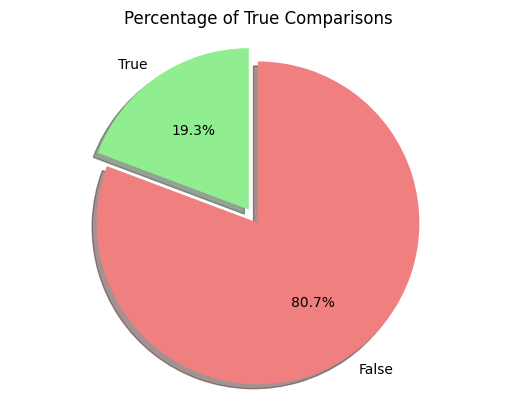

In [13]:
import matplotlib.pyplot as plt

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'True', 'False'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of True Comparisons")
plt.show()

In [3]:
import pandas as pd
from openai import OpenAI
client = OpenAI()


# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija_verbs = df['n1'].tolist()
verbs_eng_translations = df['eng'].tolist() 
verbs_eng_translations = [verb.replace(" ", "_") for verb in verbs_eng_translations]

gpt_eng_translations = []
for verb in darija_verbs:
    completion = client.chat.completions.create(
    model =  "gpt-3.5-turbo",
    messages = [
    {
        "role": "system",
        "content": "You will be provided with a verb in Moroccan Darija language. Your task is to translate it into English and provide only its lemma as an output." + 
                    "The lemma of the translated verb should not contain 'to'."
    },
    {
        "role": "user", 
        "content":  f'{verb}' 
    }
    ],
    temperature=0.4, # deterministic
   # max_tokens=1, # in case of a dot
    )
    gpt_eng_translations.append(completion.choices[0].message.content)

print(gpt_eng_translations)

['eat', 'buy', 'enter', 'exit', 'understand', 'search', 'read', 'read', 'listen', 'see', 'sleep', 'write', 'laugh', 'go', 'come', 'play', 'descend', 'sleep', 'scratch', 'play', 'Hello! How can I help you today?', 'buy', 'go', 'sit', 'write', 'hear', 'hit', 'pray', 'eat', 'laugh', 'laugh', 'laugh', 'bring', 'be', 'live', 'say', 'speak', 'have', 'cut', 'think', 'go', 'find', 'eat', 'work', 'see', 'need', 'feel', 'be', 'run', 'eat', 'begin', 'cut', 'find', 'like', 'inform', 'help', 'eat', 'find', 'secure', 'try', 'play', 'ask', 'think', 'walk', 'buy', 'play', 'run', 'run', 'read', 'start', 'pray', 'sleep', 'heal', 'see', 'change', 'finish', 'eat', 'wish', 'play', 'arrive', 'read', 'fall', 'play', 'run', 'increase', 'learn', 'wait', 'clean', 'go', 'buy', 'burn', 'build', 'choose', 'arrive', 'read', 'search', 'laugh', 'lose', 'laugh', 'break', 'imagine', 'laugh', 'dig', 'listen', 'grow', 'die', 'clean', 'visit', 'laugh', 'swim', 'think', 'sleep', 'laugh', 'hide', 'sleep', 'write', 'jump', '

In [4]:
from nltk.corpus import wordnet as wn

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""
    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(gpt_eng_translations)):
        word1, word2 = gpt_eng_translations[i], verbs_eng_translations[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)



[('eat', 'eat', 1.0, True), ('buy', 'drink', 0.2, False), ('enter', 'enter', 1.0, True), ('exit', 'go_out', 1.0, True), ('understand', 'understand', 1.0, True), ('search', 'explain', 0.2, False), ('read', 'learn', 1.0, True), ('read', 'teach', 0.25, False), ('listen', 'hear', 1.0, True), ('see', 'see', 1.0, True), ('sleep', 'smell', 0.2, False), ('write', 'taste', 0.3333333333333333, False), ('laugh', 'touch', 0.25, False), ('go', 'go', 1.0, True), ('come', 'come', 1.0, True), ('play', 'ascend', 0.3333333333333333, False), ('descend', 'go_down', 1.0, True), ('sleep', 'swim', 0.2, False), ('scratch', 'drown', 0.25, False), ('play', 'wear', 0.3333333333333333, False), ('Hello! How can I help you today?', 'take_off', 0, False), ('buy', 'buy', 1.0, True), ('go', 'sell', 0.3333333333333333, False), ('sit', 'bargain', 0.14285714285714285, False), ('write', 'write', 1.0, True), ('hear', 'clean', 0.25, False), ('hit', 'hit', 1.0, True), ('pray', 'salute', 0.1, False), ('eat', 'fatigue', 0.2, F

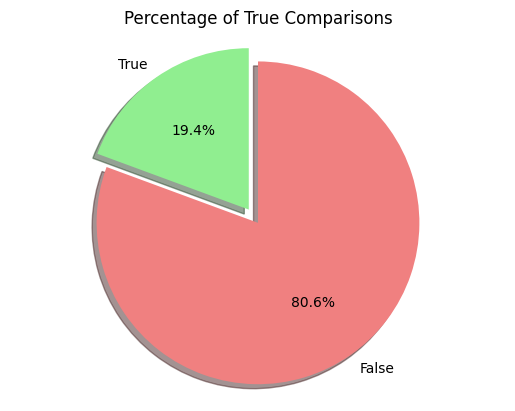

In [5]:
import matplotlib.pyplot as plt

# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'True', 'False'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of True Comparisons")
plt.show()

In [1]:
from openai import OpenAI
client = OpenAI()
import pandas as pd
# dataframe and load of verbs
df = pd.read_csv('verbs.csv')
darija_verbs = df['n1'].tolist()
verbs_eng_translations = df['eng'].tolist() 
verbs_eng_translations = [verb.replace(" ", "_") for verb in verbs_eng_translations]


test = client.chat.completions.create(
model =  "gpt-3.5-turbo",
messages = [
    {
        "role": "system",
        "content": "You will be provided with a verb in Moroccan Darija language. Your task is to translate it into English and provide only its lemma as an output." + 
                    "The lemma of the translated verb should not contain 'to'."
    },
    {
        "role": "user", 
        "content": 'شم'
    }
],
temperature=0.1, # deterministic
#max_tokens=1, # in case of a dot
#top_p=0.1
# temperature: What sampling temperature to use, between 0 and 2. Higher values like 0.8 will make the output more random, while lower values like 0.2 will make it more focused and deterministic. We generally recommend altering this or top_p but not both.
# top_p:An alternative to sampling with temperature, called nucleus sampling, where the model considers the results of the tokens with top_p probability mass. So 0.1 means only the tokens comprising the top 10% probability mass are considered.
# max_tokens: The maximum number of tokens that can be generated in the chat completion.

)

test = test.choices[0].message.content
print(test)

smell
